<h2 style='color:purple' align='center'>Credit card fraud prediction</h2>

### Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the dataset

In [9]:
train_df = pd.read_csv('dataset/fraudTrain.csv')
test_df = pd.read_csv('dataset/fraudTest.csv')

In [10]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**From the information obtained from the train dataset, we infer that there are no null values in the dataset. We can furthermore verify it using the following command.**

In [12]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**We see that there are no null values in the dataset**

In [13]:
train_df.drop('Unnamed: 0',axis=1,inplace=True) #all unique values, so we can drop the column

In [14]:
train_df.select_dtypes(include=['object']).columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

**We have date time features in the dataset. We have to parse them to be able to extract features**

In [15]:
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])

In [16]:
train_df['trans_year'] = train_df.trans_date_trans_time.dt.year
train_df['trans_month'] = train_df.trans_date_trans_time.dt.month
train_df['trans_day'] = train_df.trans_date_trans_time.dt.day

train_df['trans_hr'] = train_df.trans_date_trans_time.dt.hour
train_df['trans_min'] = train_df.trans_date_trans_time.dt.minute
train_df['trans_second'] = train_df.trans_date_trans_time.dt.second

In [17]:
train_df['dob_year'] = train_df.dob.dt.year
train_df['dob_month'] = train_df.dob.dt.month
train_df['dob_day'] = train_df.dob.dt.day

In [18]:
train_df.drop('trans_date_trans_time',axis=1,inplace=True,)
train_df.drop('dob',axis=1,inplace=True)

In [19]:
train_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,is_fraud,trans_year,trans_month,trans_day,trans_hr,trans_min,trans_second,dob_year,dob_month,dob_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,0,2019,1,1,0,0,18,1988,3,9
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,0,2019,1,1,0,0,44,1978,6,21
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,0,2019,1,1,0,0,51,1962,1,19
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,0,2019,1,1,0,1,16,1967,1,12
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,0,2019,1,1,0,3,6,1986,3,28


In [20]:
train_df.shape

(1296675, 29)

In [21]:
train_df.select_dtypes(include=['object']).columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

In [22]:
train_df['trans_num']

0          0b242abb623afc578575680df30655b9
1          1f76529f8574734946361c461b024d99
2          a1a22d70485983eac12b5b88dad1cf95
3          6b849c168bdad6f867558c3793159a81
4          a41d7549acf90789359a9aa5346dcb46
                         ...               
1296670    440b587732da4dc1a6395aba5fb41669
1296671    278000d2e0d2277d1de2f890067dcc0a
1296672    483f52fe67fabef353d552c1e662974c
1296673    d667cdcbadaaed3da3f4020e83591c83
1296674    8f7c8e4ab7f25875d753b422917c98c9
Name: trans_num, Length: 1296675, dtype: object

In [23]:
train_df.trans_num.value_counts()

trans_num
0b242abb623afc578575680df30655b9    1
c85864e7e7cf0be6d1b8597977b8afea    1
1a8a2a05638a5503cc6bb8d5735efcc1    1
4556eaf1f7def06eb500325cde4d054e    1
5e915d9f88bd09cee9655a470d9bc0bd    1
                                   ..
2d1aa5b21a993788ac19b697598ca44c    1
b50dd4b47d1ad877874661afba6eb7f6    1
5ce4e974bf15b7d9f133c6eedb81ceb1    1
64d601ddeaf4eba8b191bd1859998209    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: count, Length: 1296675, dtype: int64

In [24]:
train_df.drop('trans_num',axis=1,inplace=True)

In [25]:
# for label,content in train_df.items():
#     print(label)
#     print(content)

train_df['cc_num']

0             2703186189652095
1                 630423337322
2               38859492057661
3             3534093764340240
4              375534208663984
                  ...         
1296670         30263540414123
1296671       6011149206456997
1296672       3514865930894695
1296673       2720012583106919
1296674    4292902571056973207
Name: cc_num, Length: 1296675, dtype: int64

### Encoding the categorical features

In [26]:
for column in train_df.select_dtypes(include=['object']).columns:
    train_df[column] = train_df[column].astype('category').cat.as_ordered()


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   cc_num        1296675 non-null  int64   
 1   merchant      1296675 non-null  category
 2   category      1296675 non-null  category
 3   amt           1296675 non-null  float64 
 4   first         1296675 non-null  category
 5   last          1296675 non-null  category
 6   gender        1296675 non-null  category
 7   street        1296675 non-null  category
 8   city          1296675 non-null  category
 9   state         1296675 non-null  category
 10  zip           1296675 non-null  int64   
 11  lat           1296675 non-null  float64 
 12  long          1296675 non-null  float64 
 13  city_pop      1296675 non-null  int64   
 14  job           1296675 non-null  category
 15  unix_time     1296675 non-null  int64   
 16  merch_lat     1296675 non-null  float64 
 17  merch_lo

In [28]:
for column in train_df.select_dtypes(include=['category']).columns:
    train_df[column] = pd.Categorical(train_df[column]).codes + 1

In [29]:
train_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,is_fraud,trans_year,trans_month,trans_day,trans_hr,trans_min,trans_second,dob_year,dob_month,dob_day
0,2703186189652095,515,9,4.97,163,19,1,569,527,28,...,0,2019,1,1,0,0,18,1988,3,9
1,630423337322,242,5,107.23,310,158,1,436,613,48,...,0,2019,1,1,0,0,44,1978,6,21
2,38859492057661,391,1,220.11,116,382,2,603,469,14,...,0,2019,1,1,0,0,51,1962,1,19
3,3534093764340240,361,3,45.00,164,464,2,931,85,27,...,0,2019,1,1,0,1,16,1967,1,12
4,375534208663984,298,10,41.96,337,150,2,419,217,46,...,0,2019,1,1,0,3,6,1986,3,28


### EDA

<Axes: xlabel='gender', ylabel='count'>

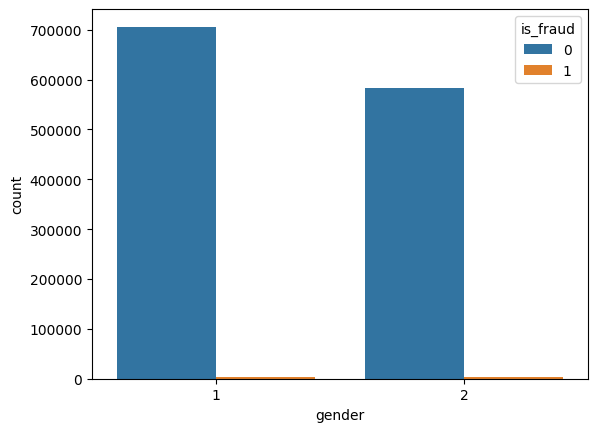

In [30]:
sns.countplot(x='gender',hue='is_fraud',data=train_df)  # 1 is female; 2 is male

<Axes: xlabel='category', ylabel='count'>

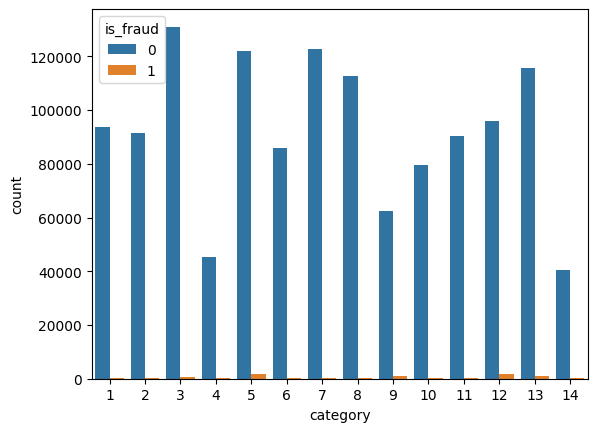

In [31]:
sns.countplot(x='category',hue='is_fraud',data=train_df)

<Axes: xlabel='is_fraud', ylabel='count'>

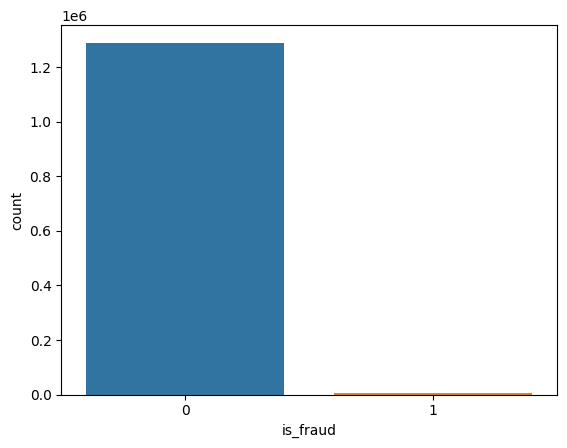

In [32]:
sns.countplot(x='is_fraud',data=train_df)

<Axes: >

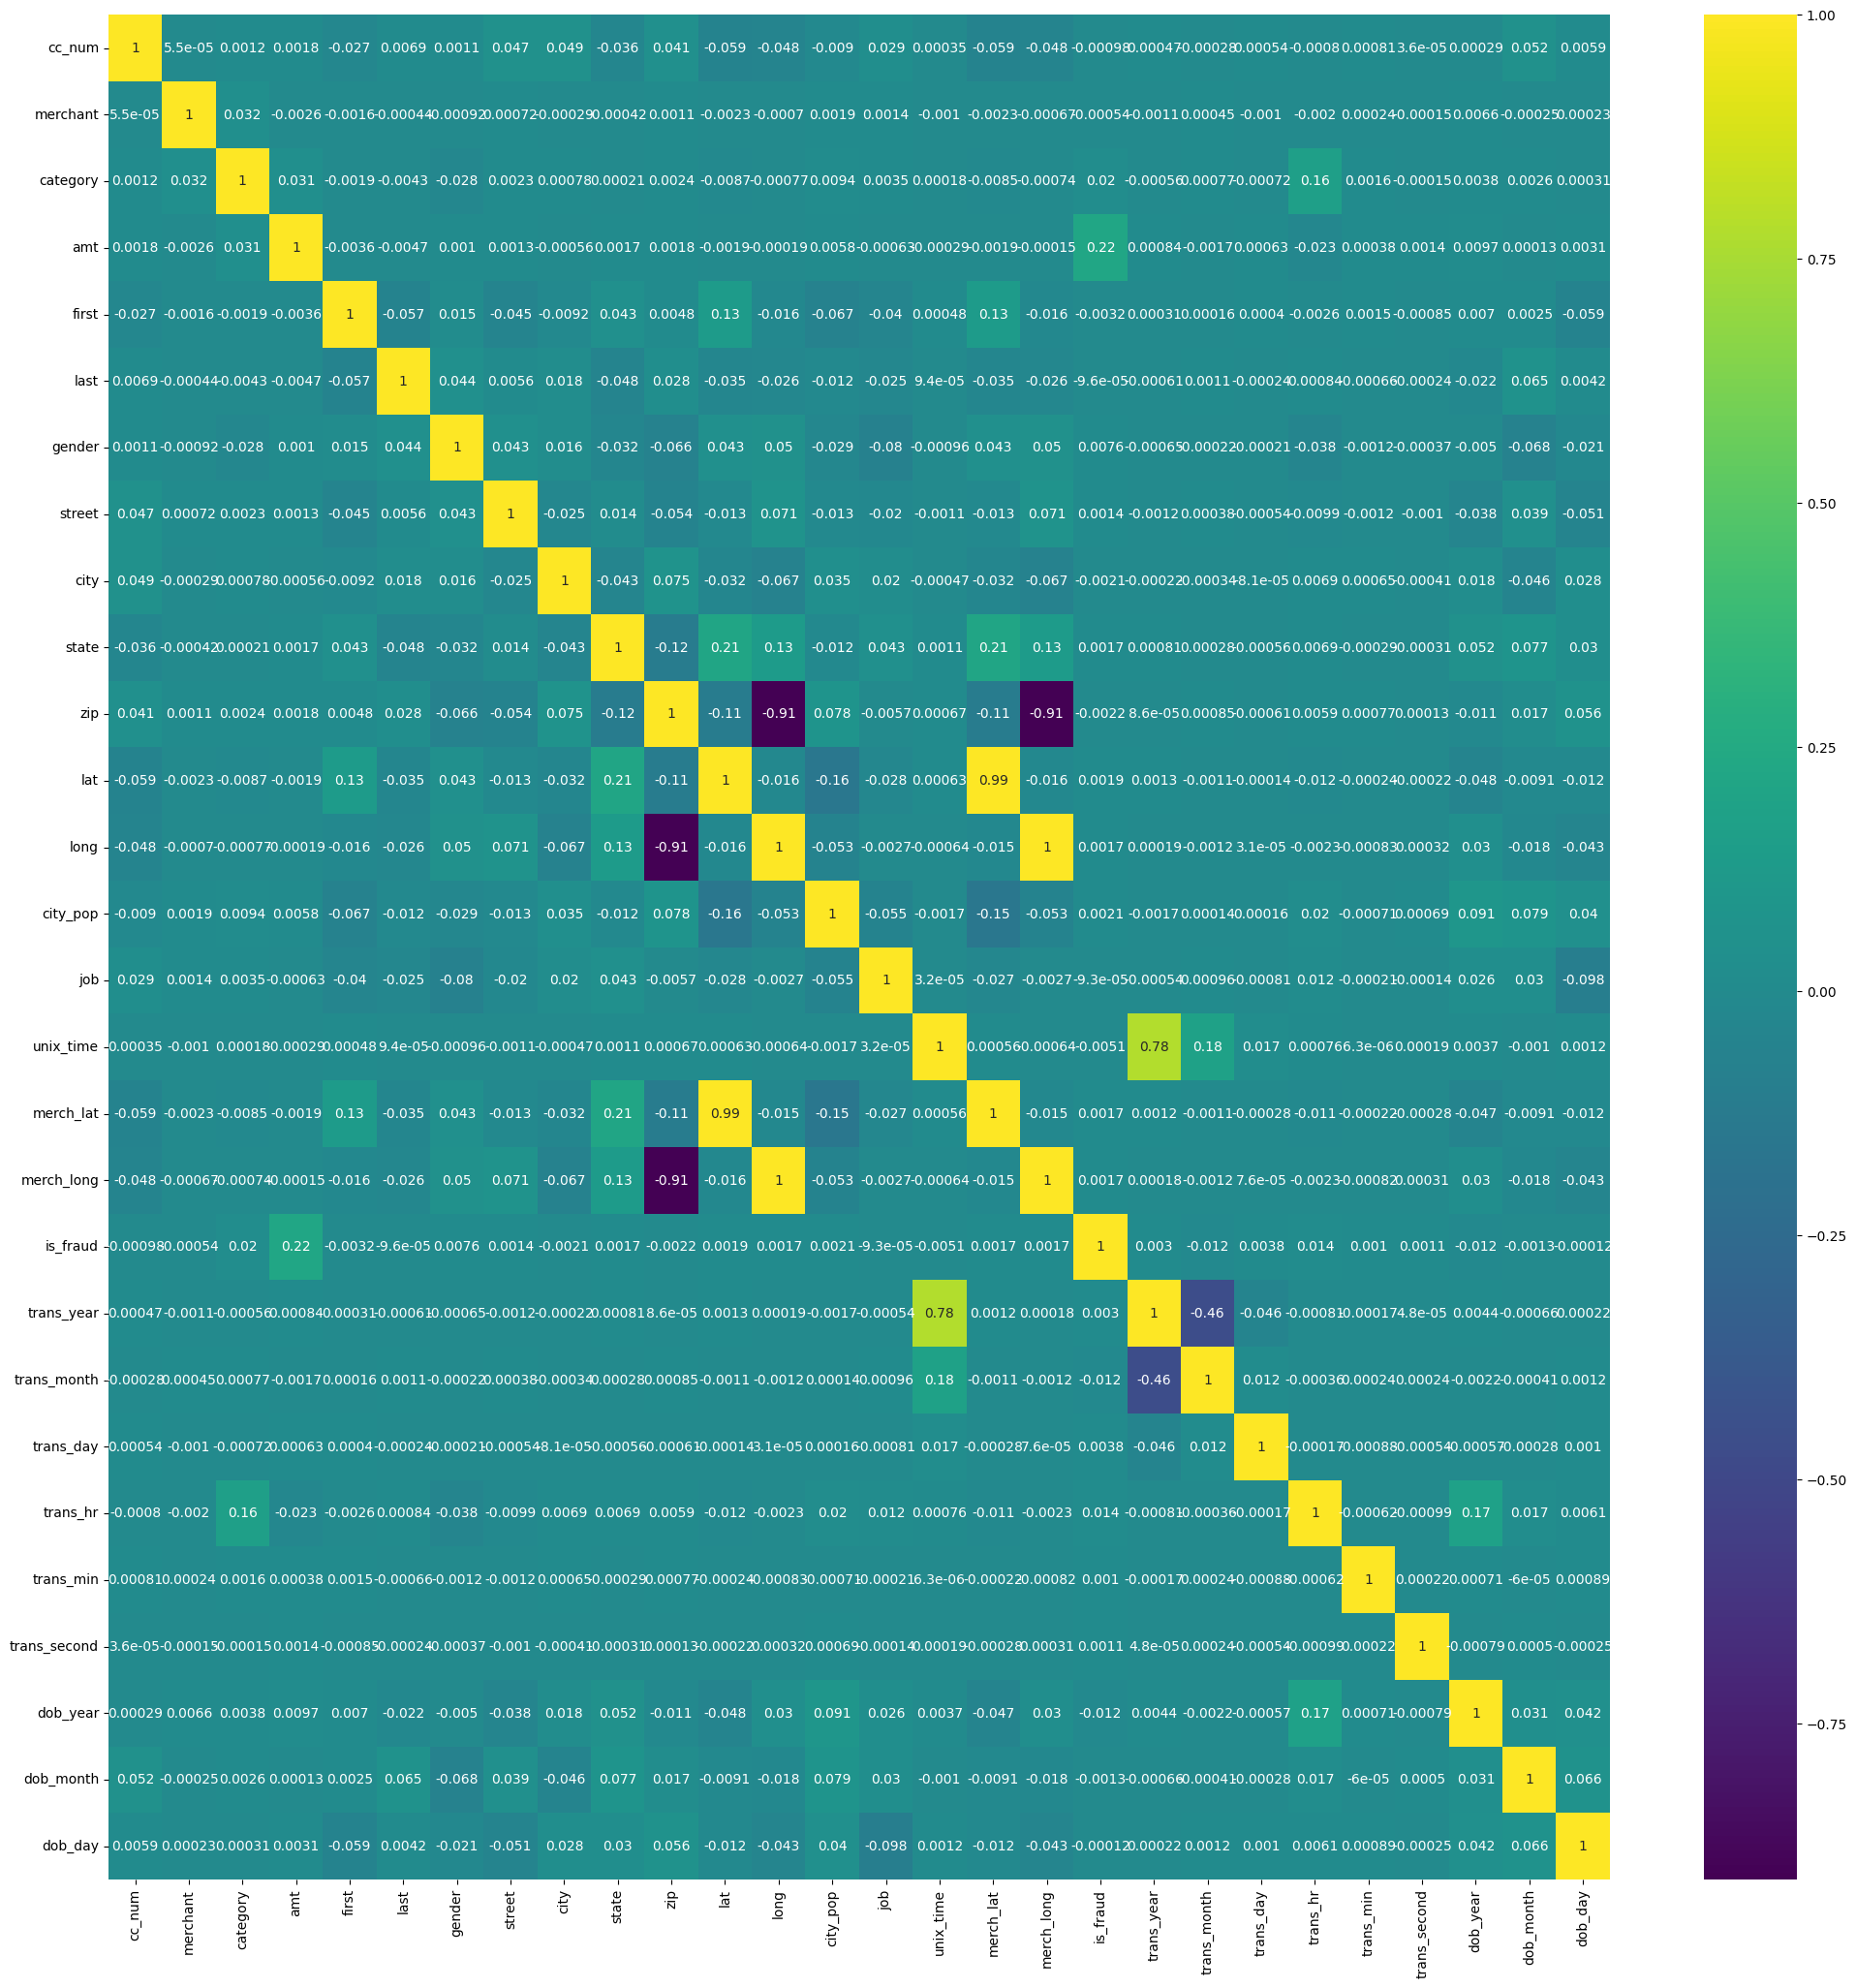

In [33]:
plt.figure(figsize=(25,25))
sns.heatmap(train_df.corr(),annot=True,cmap='viridis')

In [34]:
train_df.drop(['trans_day','dob_day','merch_long','merch_lat','unix_time'],axis=1,inplace=True)

### Handling class imbalance

In [35]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

**Here we are using random undersampling to balance the target label**

In [36]:
from sklearn.utils import resample

In [37]:
class_counts = train_df['is_fraud'].value_counts()

# Determine the class with the minimum number of instances
minority_class = class_counts.idxmin()

# Separate the majority and minority classes
majority_class = 1 - minority_class

# Sample the majority class to create a balanced dataset (adjust the sample size as needed)
df_majority = train_df[train_df['is_fraud'] == majority_class]
df_minority = train_df[train_df['is_fraud'] == minority_class]

# Perform random undersampling on the majority class
df_majority_undersampled = resample(df_majority,
                                     replace=False,  # Set to False for undersampling
                                     n_samples=len(df_minority),  # Match the minority class size
                                     random_state=42)  # For reproducibility

# Combine the undersampled majority class with the minority class
train_df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the resulting DataFrame to mix the rows
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42)


In [38]:
train_df_balanced['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

In [39]:
train_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,city_pop,job,is_fraud,trans_year,trans_month,trans_hr,trans_min,trans_second,dob_year,dob_month
0,2703186189652095,515,9,4.97,163,19,1,569,527,28,...,3495,371,0,2019,1,0,0,18,1988,3
1,630423337322,242,5,107.23,310,158,1,436,613,48,...,149,429,0,2019,1,0,0,44,1978,6
2,38859492057661,391,1,220.11,116,382,2,603,469,14,...,4154,308,0,2019,1,0,0,51,1962,1
3,3534093764340240,361,3,45.00,164,464,2,931,85,27,...,1939,329,0,2019,1,0,1,16,1967,1
4,375534208663984,298,10,41.96,337,150,2,419,217,46,...,99,117,0,2019,1,0,3,6,1986,3


### Train test split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = train_df_balanced.drop('is_fraud',axis=1)
y = train_df_balanced['is_fraud']

In [42]:
from sklearn.preprocessing import MinMaxScaler  #scaling the values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

### Data modelling

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Predictions and evaluation

In [45]:
# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier()
}

# Create an empty dictionary to store model evaluation results
results = {}

# Loop through the models, train, and evaluate them
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate model performance
    results[model_name] = accuracy  # Store results in the dictionary

# Print the evaluation results
for model_name, accuracy in results.items():
    print(f'{model_name}: Accuracy = {accuracy:.2f}')

Logistic Regression: Accuracy = 0.86
Decision Tree: Accuracy = 0.97
Random Forest: Accuracy = 0.96
K Nearest Neighbors: Accuracy = 0.75


**We can infer that Random Forest Classifier provides the best accuracy among the 4 algorithms used. We can try to tune the hyperparameters and check if there is any improvement in model performance**

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Data:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Test Data: 0.9682920330402345


In [48]:
rfc_best = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1,min_samples_split=2,n_estimators=300)
rfc_best.fit(X_train,y_train)
y_pred = rfc_best.predict(X_test)
print("Accuracy after hyperparameter tuning: ",accuracy_score(y_test,y_pred))

Accuracy after hyperparameter tuning:  0.9680255795363709


### Using the trained model on test data

#### Test data preprocessing

In [49]:
test_df = pd.read_csv('dataset/fraudTest.csv')

In [50]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [51]:
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

test_df['trans_year'] = test_df.trans_date_trans_time.dt.year
test_df['trans_month'] = test_df.trans_date_trans_time.dt.month
test_df['trans_day'] = test_df.trans_date_trans_time.dt.day

test_df['trans_hr'] = test_df.trans_date_trans_time.dt.hour
test_df['trans_min'] = test_df.trans_date_trans_time.dt.minute
test_df['trans_second'] = test_df.trans_date_trans_time.dt.second

test_df['dob_year'] = test_df.dob.dt.year
test_df['dob_month'] = test_df.dob.dt.month
test_df['dob_day'] = test_df.dob.dt.day

test_df.drop(['trans_date_trans_time','dob'],axis=1,inplace=True)

In [52]:
test_df.drop(['trans_num','trans_day','dob_day','merch_long','merch_lat','unix_time'],axis=1,inplace=True)


In [53]:
test_df.shape

(555719, 24)

In [54]:
train_df.shape

(1296675, 23)

In [55]:
test_df.drop('Unnamed: 0',axis=1,inplace=True)

In [56]:
train_df.shape

(1296675, 23)

In [57]:
test_df.shape

(555719, 23)

In [58]:
for column in test_df.select_dtypes(include=['object']).columns:
    test_df[column] = test_df[column].astype('category').cat.as_ordered()  #Encoding the categorical columns

In [59]:
for column in test_df.select_dtypes(include=['category']).columns:
    test_df[column] = pd.Categorical(test_df[column]).codes + 1

In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   cc_num        555719 non-null  int64  
 1   merchant      555719 non-null  int16  
 2   category      555719 non-null  int8   
 3   amt           555719 non-null  float64
 4   first         555719 non-null  int16  
 5   last          555719 non-null  int16  
 6   gender        555719 non-null  int8   
 7   street        555719 non-null  int16  
 8   city          555719 non-null  int16  
 9   state         555719 non-null  int8   
 10  zip           555719 non-null  int64  
 11  lat           555719 non-null  float64
 12  long          555719 non-null  float64
 13  city_pop      555719 non-null  int64  
 14  job           555719 non-null  int16  
 15  is_fraud      555719 non-null  int64  
 16  trans_year    555719 non-null  int32  
 17  trans_month   555719 non-null  int32  
 18  tran

In [61]:
test_X = test_df.drop('is_fraud',axis=1)
test_y = test_df['is_fraud']

In [62]:
test_X_scaled = scaler.transform(test_X)

In [63]:
y_pred_test = rfc_best.predict(test_X_scaled)
print("Test Accuracy: ",accuracy_score(y_pred_test,test_y))

Test Accuracy:  0.9712570561740735


**We see that the selected model (Random Forest Classifier) has an overall decent performance on the test dataset after tuning the hyperparameters**